## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans

## Load the data

In [ ]:
!unzip "/content/A simple example of clustering Dataset.zip" -d "/content/"

Archive:  /content/A simple example of clustering Dataset.zip
  inflating: /content/3.01. Country clusters.csv  


In [ ]:
df = pd.read_csv('/content/3.01. Country clusters.csv')

In [ ]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

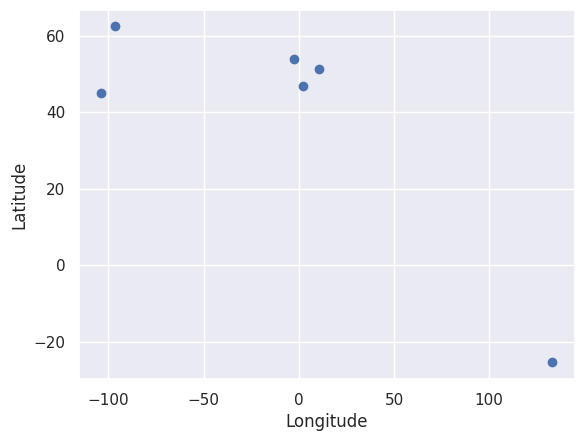

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Clustering

### Using Latitude & Longitude

#### Select the features

In [ ]:
x = df.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


#### K = 2

In [ ]:
kmean = KMeans(2)

In [ ]:
kmean.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
identified_clusters = kmean.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
df_clusters = df.copy()
df_clusters['Cluster'] = identified_clusters
df_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


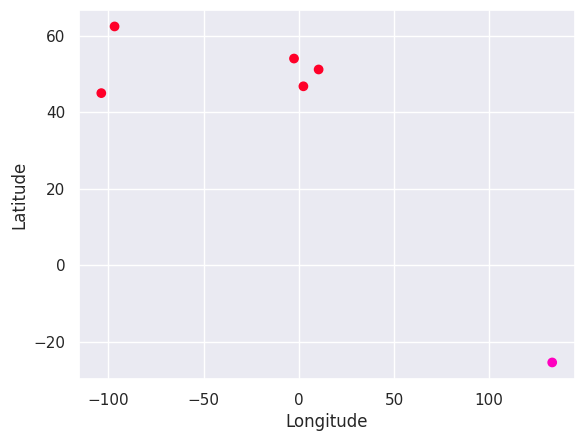

In [ ]:
plt.scatter(df_clusters['Longitude'], df_clusters['Latitude'], c=df_clusters['Cluster'], cmap = 'gist_rainbow')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#### K = 3

In [ ]:
kmean = KMeans(3)

In [ ]:
kmean.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmean.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 0, 0, 2], dtype=int32)

In [ ]:
df_clusters = df.copy()
df_clusters['Cluster'] = identified_clusters
df_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


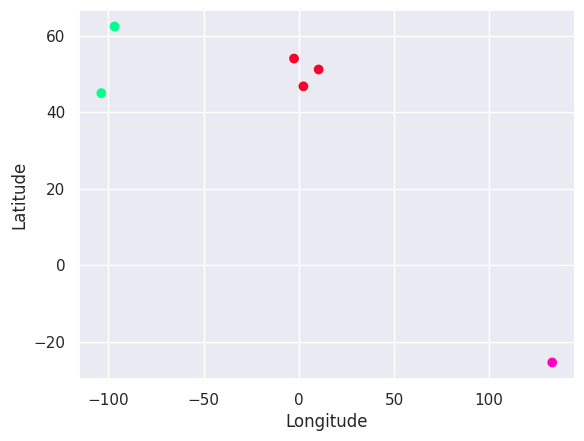

In [ ]:
plt.scatter(df_clusters['Longitude'], df_clusters['Latitude'], c=df_clusters['Cluster'], cmap = 'gist_rainbow')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Using Language

#### Map the data

In [ ]:
# Create a copy of the original dataset
data_mapped = df.copy()
# Map languages with 0, 1, and 2. Note that this is not the best way to do that, but for now we will use it
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
# Check if we did it correctly
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### Select the features

In [ ]:
x = data_mapped.iloc[:, 3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


#### K = 3

In [ ]:
kmean = KMeans(3)

In [ ]:
kmean.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmean.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 0, 1, 0], dtype=int32)

In [ ]:
df_clusters = df.copy()
df_clusters['Cluster'] = identified_clusters
df_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


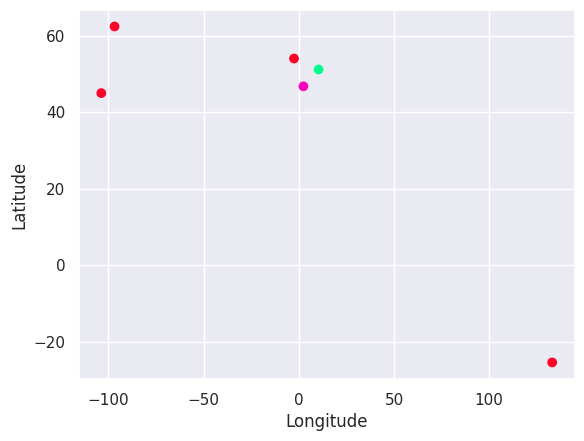

In [ ]:
plt.scatter(df_clusters['Longitude'], df_clusters['Latitude'], c=df_clusters['Cluster'], cmap = 'gist_rainbow')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Using Latitude & Longitude & Language

#### Map the data

In [ ]:
# Create a copy of the original dataset
data_mapped = df.copy()
# Map languages with 0, 1, and 2. Note that this is not the best way to do that, but for now we will use it
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
# Check if we did it correctly
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### Select the features

In [ ]:
x = data_mapped.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


#### K = 2

In [ ]:
kmean = KMeans(2)

In [ ]:
kmean.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
identified_clusters = kmean.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 0], dtype=int32)

In [ ]:
df_clusters = df.copy()
df_clusters['Cluster'] = identified_clusters
df_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


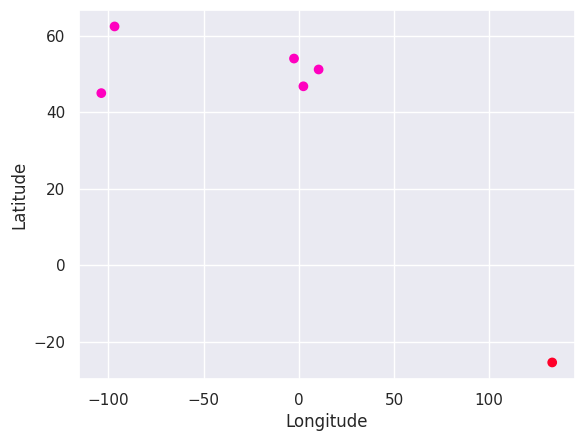

In [ ]:
plt.scatter(df_clusters['Longitude'], df_clusters['Latitude'], c=df_clusters['Cluster'], cmap = 'gist_rainbow')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#### K = 3

In [ ]:
kmean = KMeans(3)

In [ ]:
kmean.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmean.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 2, 1], dtype=int32)

In [ ]:
df_clusters = df.copy()
df_clusters['Cluster'] = identified_clusters
df_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


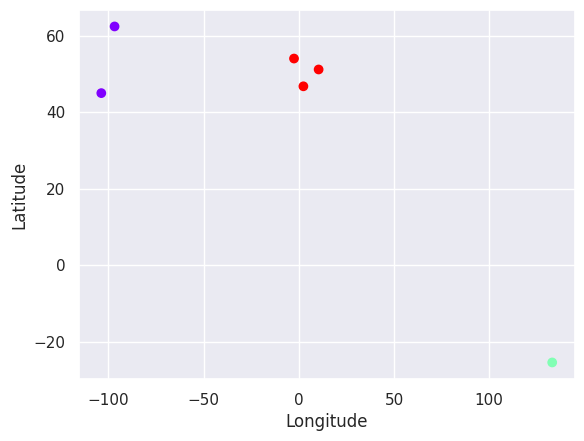

In [ ]:
plt.scatter(df_clusters['Longitude'], df_clusters['Latitude'], c=df_clusters['Cluster'], cmap = 'rainbow')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Using Latitude & Longitude & Language By Selecting the Numbers of `K`

#### Map the data

In [ ]:
# Create a copy of the original dataset
data_mapped = df.copy()
# Map languages with 0, 1, and 2. Note that this is not the best way to do that, but for now we will use it
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
# Check if we did it correctly
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### Select the features

In [ ]:
x = data_mapped.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


#### WCSS

In [ ]:
# Get the WCSS for the current solution
kmean.inertia_

290.10523333333333

In [ ]:
wcss = []
for i in range(1, 7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

#### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

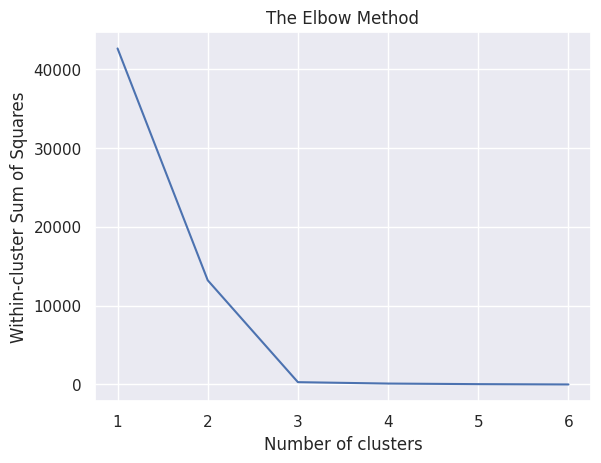

In [ ]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,7)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

In [ ]:
kmean = KMeans(3)

In [ ]:
kmean.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmean.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 0, 1], dtype=int32)

In [ ]:
df_clusters = df.copy()
df_clusters['Cluster'] = identified_clusters
df_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


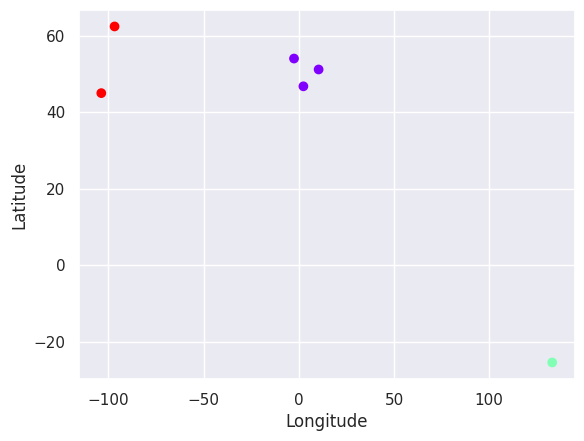

In [ ]:
plt.scatter(df_clusters['Longitude'], df_clusters['Latitude'], c=df_clusters['Cluster'], cmap = 'rainbow')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()